# Avocado Price Elasticity Analysis 

### Abstract
The Avocado Price Elasticity Analysis project aimed to explore the relationship between avocado prices and consumer demand. Avocado consumption has witnessed a significant surge in recent years, and understanding price elasticity can provide valuable insights for producers, retailers, and policymakers.

The project utilized a comprehensive dataset that included historical avocado price data along with various relevant variables such as volume, region, and categorical attributes. The analysis encompassed both descriptive and inferential statistical techniques to gain insights into price elasticity.

The main focus of the analysis was estimating price elasticity, which measures the sensitivity of consumer demand to changes in avocado prices. Several econometric modeling techniques, including regression analysis and elasticity estimation, were applied to quantify the relationship between price and demand.

### Outline
1. PED Introduction
2. Data Collection and Understanding
3. Data Cleaning
4. Regression Analysis

    4.1 OLS 
    
    4.2 RLS
5. Seasonality Test
6. Model Modification
7. Conclusion and Limitation

### Price Elasticity of Demand (PED)

Price elasticity of demand is a concept in economics that measures the responsiveness of consumer demand to changes in the price of a product or service. It quantifies how sensitive the quantity demanded is to variations in price. The calculation of price elasticity involves determining the percentage change in quantity demanded divided by the percentage change in price.

The steepness of the demand curve determines the price elasticity of demand. If the demand curve is relatively flat, it indicates that the quantity demanded is highly responsive to changes in price, resulting in an elastic demand. In this case, a small change in price leads to a relatively large change in the quantity demanded. The price elasticity of demand is greater than 1 in elastic demand.

Conversely, if the demand curve is steep, it suggests that the quantity demanded is less responsive to price changes, resulting in an inelastic demand. Here, a change in price has a relatively small impact on the quantity demanded. The price elasticity of demand is less than 1 in inelastic demand.centage change in quantity demanded divided by the percentage change in price.

__PED Equation__

$PED = \frac{\vartriangle{Q}\%}{\vartriangle{P}\%}$

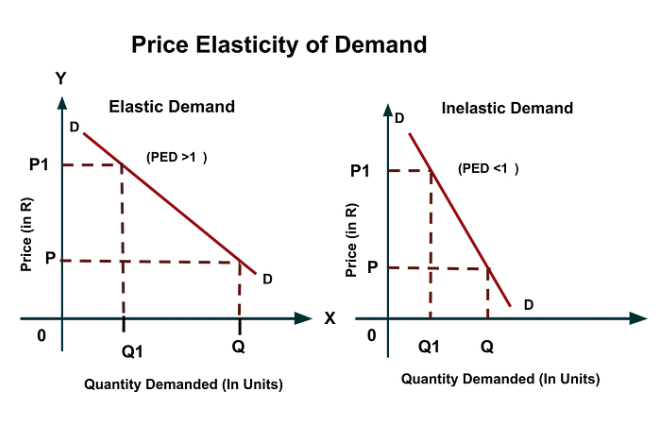


### Data Collection and Understanding
##### Importation of libraries

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import re
from IPython.display import display, HTML, Image

import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings

##### Data Loading

In [173]:
avocado = pd.read_csv('avocado.csv')
avocado.head(5)


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany


This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

* Date - The date of the observation
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold

##### Data Cleaning

Subset the original dataset to keep the crucial variables: Date, Price, and Volume

In [174]:
avocado_subset = avocado[['Date','AveragePrice','Total Volume']]
avocado_subset.head(5)

,Date,AveragePrice,Total Volume
0,2015-12-27,1.33,64236.62
1,2015-12-20,1.35,54876.98
2,2015-12-13,0.93,118220.22
3,2015-12-06,1.08,78992.15
4,2015-11-29,1.28,51039.60


Detect missing value

In [175]:
avocado_subset.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
dtype: int64

Check the data type

In [176]:
data_types = avocado_subset.dtypes
print(data_types)

Date             object
AveragePrice    float64
Total Volume    float64
dtype: object


Plot the data points

       AveragePrice  Total Volume
count      18249.00      18249.00
mean           1.41     850644.01
std            0.40    3453545.36
min            0.44         84.56
25%            1.10      10838.58
50%            1.37     107376.76
75%            1.66     432962.29
max            3.25   62505646.52


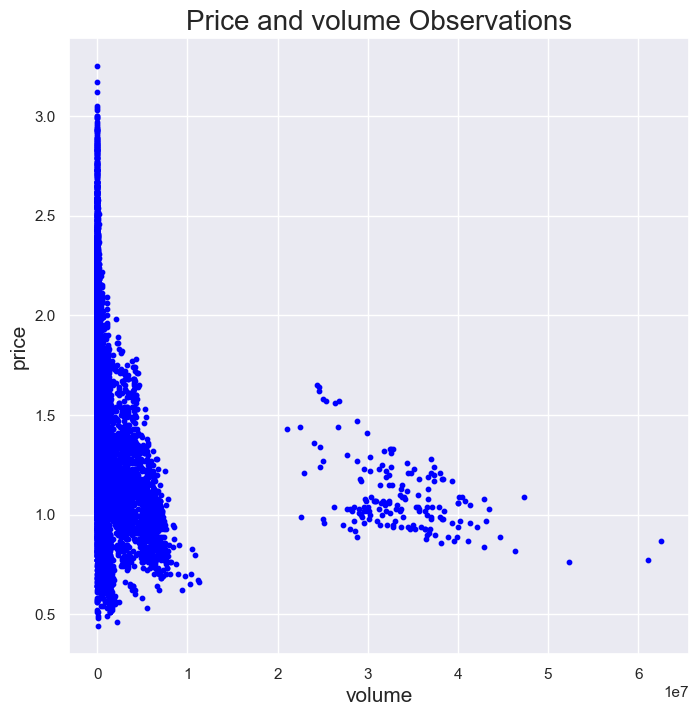

169
            Date  AveragePrice  Total Volume
9097  2018-02-04          0.87   62505646.52
8366  2017-02-05          0.77   61034457.10
5506  2016-02-07          0.76   52288697.89
8353  2017-05-07          1.09   47293921.60
5493  2016-05-08          0.82   46324529.70
...          ...           ...           ...
5464  2016-11-27          1.21   22923062.65
2656  2015-11-29          0.99   22617999.38
5467  2016-11-06          1.44   22534698.38
5468  2016-10-30          1.43   21009730.21
8419  2017-02-05          0.66   11274749.11

[170 rows x 3 columns]


In [177]:
summary_stats = avocado_subset.describe()
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print(summary_stats)

sns.set()
fig_static = plt.figure(figsize=(8,8))
plt.scatter(avocado_subset['Total Volume'],avocado_subset['AveragePrice'], s = 10, c = 'blue')
plt.ylabel('price', fontsize = 15)
plt.xlabel('volume', fontsize = 15)
plt.title('Price and volume Observations', fontsize = 20)
plt.show()

count = sum(avocado['Total Volume'] > 20000000)
print(count)

Volume_sorted = avocado_subset.sort_values(by='Total Volume', ascending=False).head(170)
print(Volume_sorted)
                                                                                    



Remove outliers

In [178]:

df = avocado_subset[avocado_subset['Total Volume'] <= 20000000]
summary_stats = df.describe()
print(summary_stats)

       AveragePrice  Total Volume
count      18080.00      18080.00
mean           1.41     543262.22
std            0.40    1219641.48
min            0.44         84.56
25%            1.10      10715.35
50%            1.38     104121.85
75%            1.67     416192.49
max            3.25   11274749.11


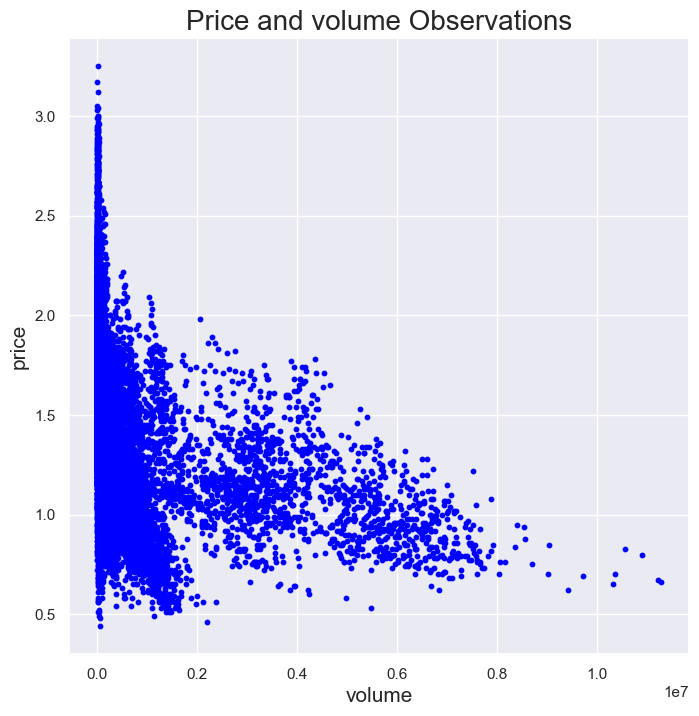

In [179]:
sns.set()
fig_static = plt.figure(figsize=(8,8))
plt.scatter(df['Total Volume'],df['AveragePrice'], s = 10, c = 'blue')
plt.ylabel('price', fontsize = 15)
plt.xlabel('volume', fontsize = 15)
plt.title('Price and volume Observations', fontsize = 20)
plt.show()

In [180]:
quantile_10 = df['Total Volume'].quantile(0.1)
df = df[df['Total Volume'] >= quantile_10]
summary_stats = df.describe()
print(summary_stats)

       AveragePrice  Total Volume
count      16272.00      16272.00
mean           1.37     603362.35
std            0.39    1271492.63
min            0.44       3873.46
25%            1.08      18040.83
50%            1.33     142644.40
75%            1.61     484151.36
max            3.25   11274749.11


Take the __natrual logarithm__ of both price and volume variables.

In econometrics, using a log-log model refers to taking the natural logarithm of both the dependent variable and independent variables in a regression analysis. This transformation can be beneficial in certain cases to address _Percentage Change Interpretation_. 

Using a log-log model allows for the interpretation of coefficients as approximate percentage changes. Taking the logarithm of the variables converts them into their logarithmic form, and the coefficients represent the estimated percentage change in the dependent variable for a 1% change in the independent variable. This can be useful when the focus is on relative changes rather than absolute changes.

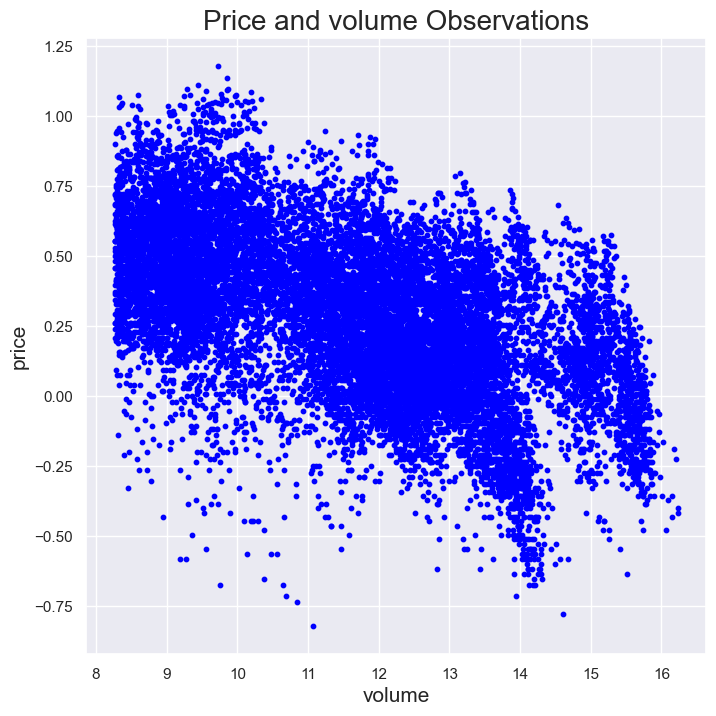

In [181]:
df['Log_Price'] = np.log(df['AveragePrice'])
df['Log_Volume'] = np.log(df['Total Volume'])

sns.set()
fig_static = plt.figure(figsize=(8,8))
plt.scatter(df['Log_Volume'],df['Log_Price'], s = 10, c = 'blue')
plt.ylabel('price', fontsize = 15)
plt.xlabel('volume', fontsize = 15)
plt.title('Price and volume Observations', fontsize = 20)
plt.show()

## Regression Analysis
### Ordinary Least Squares (OLS) Estimation

In [182]:
X = df['Log_Price']
y = df['Log_Volume']
X = sm.add_constant(X)
lm_model = sm.OLS(y, X)
results = lm_model.fit()
print(results.summary())
warnings.filterwarnings("ignore")

                            OLS Regression Results                            
Dep. Variable:             Log_Volume   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     7457.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:41:40   Log-Likelihood:                -31132.
No. Observations:               16272   AIC:                         6.227e+04
Df Residuals:                   16270   BIC:                         6.228e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.7182      0.018    715.451      0.0

Statistical Measures Observation from the Modelling
1. T-score

    The t-score, also known as the t-value, is a statistical measure that assesses the difference between a sample mean and a population mean, considering the variability within the sample. It is commonly used in hypothesis testing to determine whether there is a significant difference between two groups or conditions. A higher absolute t-score indicates a larger difference between the means.
    
2. P-value

    The p-value is a probability value that measures the strength of evidence against the null hypothesis in a statistical test. It indicates the likelihood of obtaining the observed data (or more extreme) if the null hypothesis is true. A p-value less than a predetermined significance level (e.g., 0.05) is typically considered statistically significant, suggesting that the observed results are unlikely to occur by chance.
    In this model, we can disregard the null hypothesis that price has no effect on Quantity sold, which means price have some appreciable effect on Quantity sold for the reqular quantity

3. R-squared

    R-squared, also known as the coefficient of determination, is a statistical measure that indicates the proportion of variance in the dependent variable that can be explained by the independent variables in a regression model. It ranges from 0 to 1, where a higher R-square value indicates a better fit of the regression model to the data. It provides an estimate of the goodness of fit and the percentage of variability explained by the model.
    The R-squared is only 0.314, suggesting this simple regression model only inluding one explanatory varibale (Price) is not a vary good fit to the data.
    

Coefficient is -3.86, which meansing 1% price increase will be associated to 3.86% demand decrease in volume.





### OLS Regression Plot

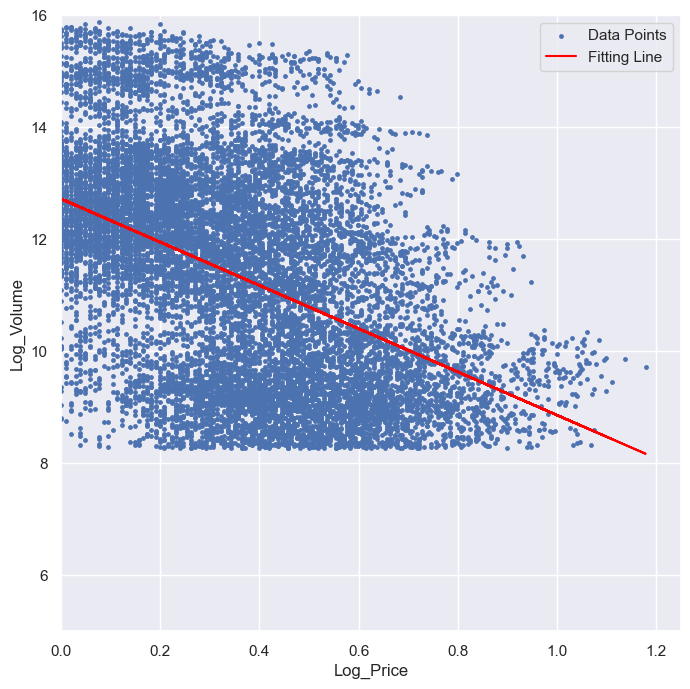

In [183]:
sns.set()
fig_static = plt.figure(figsize=(8,8))
intercept = results.params[0]
slope = results.params[1]
plt.scatter(df['Log_Price'], df['Log_Volume'], label='Data Points',s=6)
plt.xlim(0,1.25)
plt.ylim(5,16)
plt.plot(df['Log_Price'], intercept + slope * df['Log_Price'], color='red', label='Fitting Line')
plt.xlabel('Log_Price')
plt.ylabel('Log_Volume')
plt.legend()
plt.show()

### Recursive Least Square (RLS)

Finally we apply Recursive Least Square (RLS) filter to investigate parameter instability. 

RLS is an adaptive algorithm used for incremental learning. It updates the model parameters iteratively as new data points arrive. There are as many estimates as there are data points, the summary table only presents the regression parameters estimated on the entire sample; these estimates are equivalent to OLS estimates.

In [184]:
y = df['Log_Volume']
X = sm.add_constant(df['Log_Price'])
mod = sm.RecursiveLS(y, X)
res = mod.fit()
print(res.summary())
warnings.filterwarnings("ignore")

                           Statespace Model Results                           
Dep. Variable:             Log_Volume   No. Observations:                16272
Model:                    RecursiveLS   Log Likelihood              -31139.920
Date:                Sun, 09 Jul 2023   R-squared:                       0.314
Time:                        14:41:42   AIC                          62283.839
Sample:                             0   BIC                          62299.234
                              - 16272   HQIC                         62288.927
Covariance Type:            nonrobust   Scale                            2.688
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.7182      0.018    715.451      0.000      12.683      12.753
Log_Price     -3.8622      0.045    -86.356      0.000      -3.950      -3.775
Ljung-Box (L1) (Q):               15220.02   Jarque-

RLS Plot

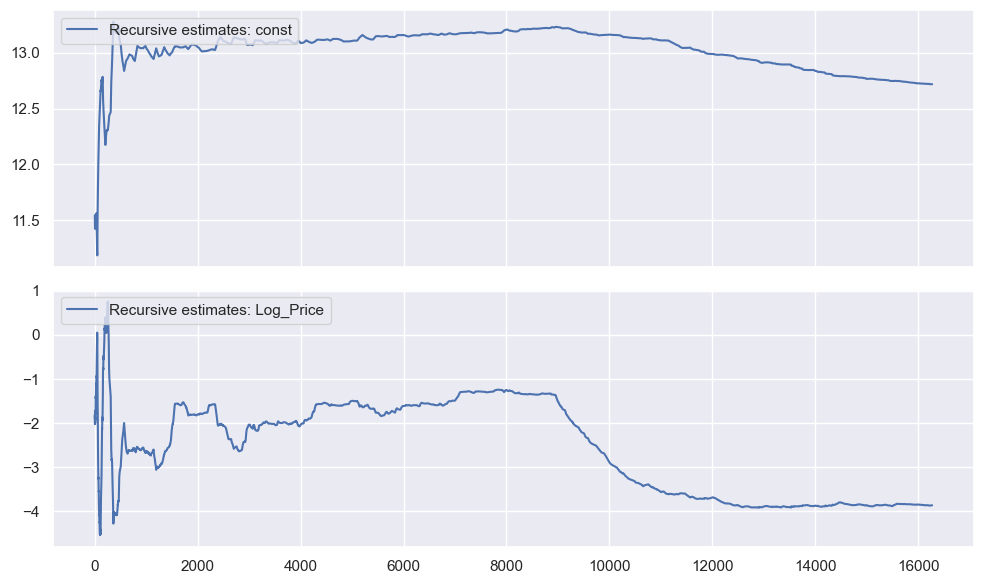

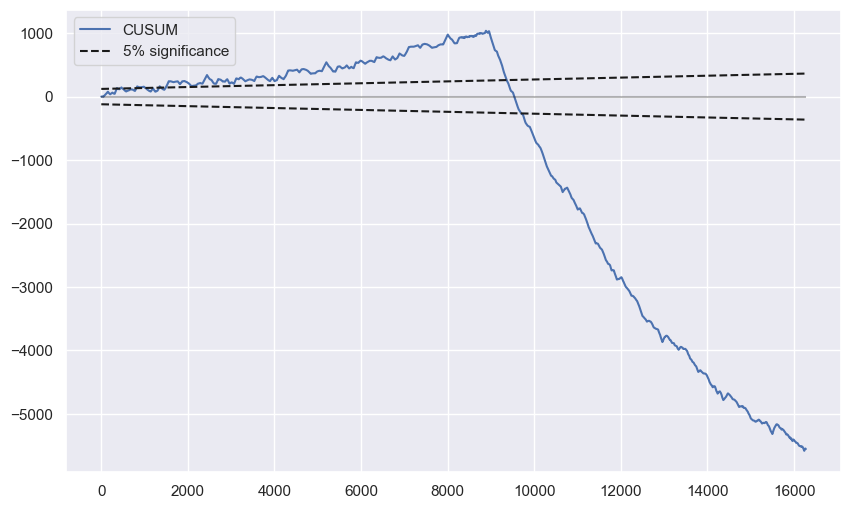

In [190]:
res.plot_recursive_coefficient(range(mod.k_exog), alpha=None, figsize=(10,6))
fig = res.plot_cusum(figsize=(10,6));

Based on plots above, we can find the model's parameter is not stable enough when more new data is arriving, thus we fail to give the conclusion that the price elasticity is -3.86. 

The model need to be adjusted further.


### Seasonality Test 

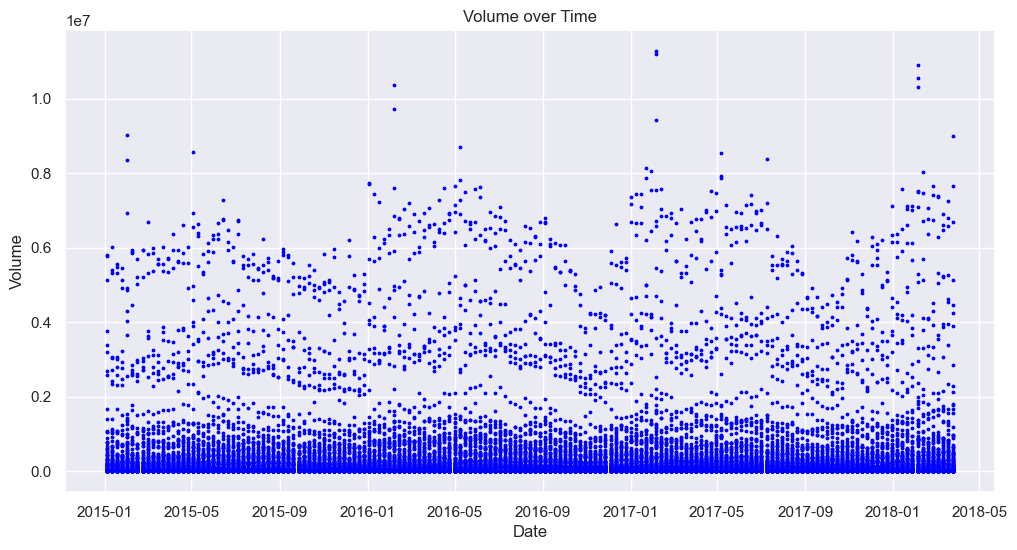

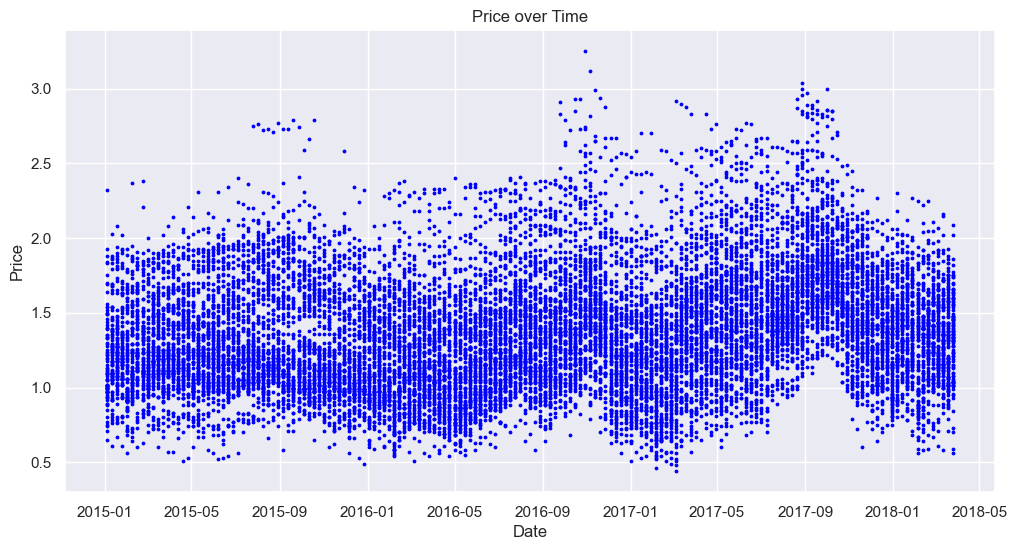

In [186]:

df['Date']=pd.to_datetime(df['Date'])

sns.set()
fig_static = plt.figure(figsize=(12,6))
plt.scatter(df['Date'], df['Total Volume'], marker='o', linestyle='-', color='blue',s=3)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume over Time')
plt.show()


sns.set()
fig_static = plt.figure(figsize=(12,6))
plt.scatter(df['Date'], df['AveragePrice'], marker='o', linestyle='-', color='blue',s=3)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price over Time')
plt.show()

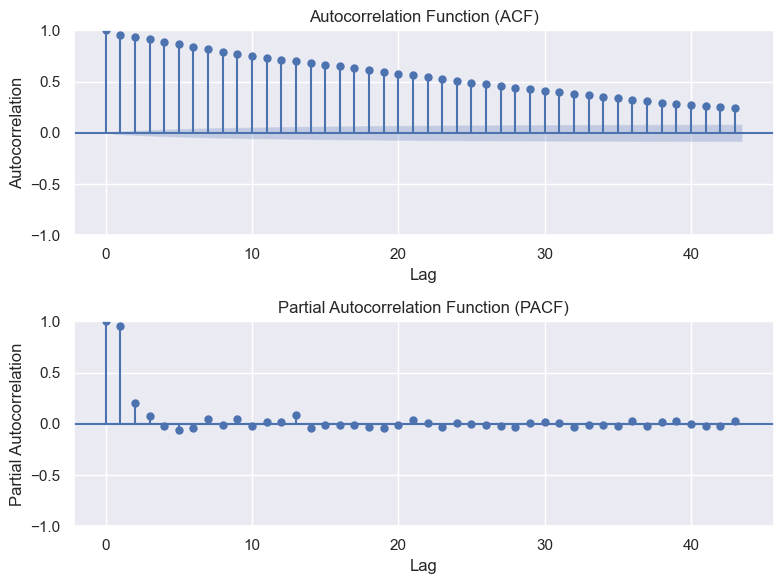

In [187]:
df_ts = df[['Date','Total Volume']]
series = df_ts['Total Volume']
fig, ax = plt.subplots(nrows=2, figsize=(8, 6))
plot_acf(series, ax=ax[0])
plot_pacf(series, ax=ax[1])

ax[0].set_title('Autocorrelation Function (ACF)')
ax[1].set_title('Partial Autocorrelation Function (PACF)')
ax[0].set_xlabel('Lag')
ax[1].set_xlabel('Lag')
ax[0].set_ylabel('Autocorrelation')
ax[1].set_ylabel('Partial Autocorrelation')
plt.tight_layout()
plt.show()
warnings.filterwarnings("ignore")


ACF (Autocorrelation Function) Plot:
A significant spike at a specific lag indicates a correlation between the observation at that lag and the current observation. It suggests a potential presence of a seasonal pattern at that lag.
In the presence of seasonality, you may observe repeated significant spikes at regular intervals, indicating the periodic nature of the data.
PACF (Partial Autocorrelation Function) Plot:

A significant spike at a specific lag in the PACF plot represents the direct correlation between the observation at that lag and the current observation, after removing the effects of the intermediate lags.
Similar to the ACF plot, significant spikes at specific lags in the PACF plot can indicate the presence of seasonality at those lags.

In conclusion, we didn't find significant seasonality exisiting in data.